### Machine Learning Task: Cake Price Prediction
### Goal
 build a machine learning model that can predict the price of cakes based on their features.
 
 
#### Dataset
➔ You are provided with a dataset in CSV format with the following columns:

   ◆ Sold_On: The day on which the cake has been sold (e.g., Saturday, Sunday, Monday, Tuesday, Wednesday, Thursday, Friday).
   
   ◆ Size: The size of the cake (e.g., small, medium, large).
   
   ◆ Ingredients_Cost: The cost of the ingredients used to make the cake.
   
   ◆ Time_Taken: The time taken to make the cake (in hours).
   
   ◆ Price: The price of the cake.
   
   ◆ Amount: The amount of similar cakes sold in the same order (Price and all other parameters are for one cake, not the whole order).
   
   ◆ Gender: The gender of person ordering the cake(s).

In [5]:
#libarary 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
#Reading the Dataset.
cake = pd.read_csv ('dataset (2).csv')
cake

,Sold_On,Size,Ingredients_Cost,Design_Complexity,Time_Taken,Price,Amount,Gender
0,Monday,large,28,complex,6,49,10,female
1,Saturday,medium,65,simple,2,93,9,female
2,Wednesday,large,96,simple,5,128,8,male
3,Tuesday,medium,155,simple,3,198,6,female
4,Saturday,large,20,simple,2,32,5,male
...,...,...,...,...,...,...,...,...
3995,Thursday,medium,200,simple,4,283,10,female
3996,Saturday,medium,152,complex,7,202,1,female
3997,Friday,small,153,complex,10,218,6,male
3998,Tuesday,small,207,simple,4,280,5,male


In [4]:
# Use pandas to examine some info of the dataset
cake.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Sold_On            4000 non-null   object
 1   Size               4000 non-null   object
 2   Ingredients_Cost   4000 non-null   int64 
 3   Design_Complexity  4000 non-null   object
 4   Time_Taken         4000 non-null   int64 
 5   Price              4000 non-null   int64 
 6   Amount             4000 non-null   int64 
 7   Gender             4000 non-null   object
dtypes: int64(4), object(4)
memory usage: 250.1+ KB


In [8]:
cake.isnull().sum ()  # no any null values 

Sold_On              0
Size                 0
Ingredients_Cost     0
Design_Complexity    0
Time_Taken           0
Price                0
Amount               0
Gender               0
dtype: int64

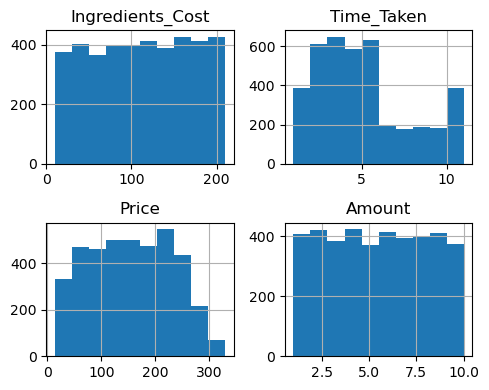

In [11]:
# Use pandas to examine the histograms of the dataset columns (numerical)
import matplotlib.pyplot as plt

cake.hist(bins=10, figsize=(5, 4))
plt.tight_layout ()
plt.show()

##  Manipulating the features

- One-hot encoding
- Feature selection


In [12]:
# One-hot encoding
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder()
encoded_data = encoder.fit_transform(cake[["Sold_On", "Size" , "Design_Complexity","Gender"]]).toarray()
encoded_data = pd.DataFrame(encoded_data, columns=encoder.get_feature_names_out())
encoded_data

,Sold_On_Friday,Sold_On_Monday,Sold_On_Saturday,Sold_On_Sunday,Sold_On_Thursday,Sold_On_Tuesday,Sold_On_Wednesday,Size_large,Size_medium,Size_small,Design_Complexity_complex,Design_Complexity_simple,Gender_female,Gender_male
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0
3,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0
4,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3995,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0
3996,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
3997,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0
3998,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0


In [13]:
preprocessed_data = pd.concat ([cake,encoded_data ],  axis = 1)
preprocessed_data

,Sold_On,Size,Ingredients_Cost,Design_Complexity,Time_Taken,Price,Amount,Gender,Sold_On_Friday,Sold_On_Monday,...,Sold_On_Thursday,Sold_On_Tuesday,Sold_On_Wednesday,Size_large,Size_medium,Size_small,Design_Complexity_complex,Design_Complexity_simple,Gender_female,Gender_male
0,Monday,large,28,complex,6,49,10,female,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
1,Saturday,medium,65,simple,2,93,9,female,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0
2,Wednesday,large,96,simple,5,128,8,male,0.0,0.0,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0
3,Tuesday,medium,155,simple,3,198,6,female,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0
4,Saturday,large,20,simple,2,32,5,male,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3995,Thursday,medium,200,simple,4,283,10,female,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0
3996,Saturday,medium,152,complex,7,202,1,female,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
3997,Friday,small,153,complex,10,218,6,male,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0
3998,Tuesday,small,207,simple,4,280,5,male,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0


In [14]:
#Feature selection
preprocessed_data.drop('Sold_On',axis='columns',inplace=True)
preprocessed_data.drop('Size',axis='columns',inplace=True)
preprocessed_data.drop('Design_Complexity',axis='columns',inplace=True)
preprocessed_data.drop('Gender',axis='columns',inplace=True)

In [15]:
preprocessed_data

,Ingredients_Cost,Time_Taken,Price,Amount,Sold_On_Friday,Sold_On_Monday,Sold_On_Saturday,Sold_On_Sunday,Sold_On_Thursday,Sold_On_Tuesday,Sold_On_Wednesday,Size_large,Size_medium,Size_small,Design_Complexity_complex,Design_Complexity_simple,Gender_female,Gender_male
0,28,6,49,10,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
1,65,2,93,9,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0
2,96,5,128,8,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0
3,155,3,198,6,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0
4,20,2,32,5,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3995,200,4,283,10,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0
3996,152,7,202,1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
3997,153,10,218,6,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0
3998,207,4,280,5,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0


# Training models

### Features-labels split and train-validation split

In [17]:
# drop ["Price"] column and save that to features
features = preprocessed_data.drop('Price',axis='columns')
features

,Ingredients_Cost,Time_Taken,Amount,Sold_On_Friday,Sold_On_Monday,Sold_On_Saturday,Sold_On_Sunday,Sold_On_Thursday,Sold_On_Tuesday,Sold_On_Wednesday,Size_large,Size_medium,Size_small,Design_Complexity_complex,Design_Complexity_simple,Gender_female,Gender_male
0,28,6,10,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
1,65,2,9,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0
2,96,5,8,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0
3,155,3,6,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0
4,20,2,5,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3995,200,4,10,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0
3996,152,7,1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
3997,153,10,6,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0
3998,207,4,5,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0


In [19]:
# save the ["Price"] column to labels
labels = cake['Price']
labels

0        49
1        93
2       128
3       198
4        32
       ... 
3995    283
3996    202
3997    218
3998    280
3999    265
Name: Price, Length: 4000, dtype: int64

In [20]:
from sklearn.model_selection import train_test_split

In [28]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.2, random_state=42)

In [29]:
print(len(X_train))
print(len(X_test))
print(len(y_train))
print(len(y_test))

3200
800
3200
800


### Training different models on our dataset
- LinearRegression
- RandomForestRegressor

### Train and evaluate a linear regression model

In [30]:
# train model 
from sklearn.linear_model import LinearRegression
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)

LinearRegression()

In [31]:
print (linear_model.score(X_train, y_train))

0.9757536906459015


In [43]:
# Get the coefficients and intercept
coefficients = linear_model.coef_
intercept = linear_model.intercept_

print("Coefficients:", coefficients)
print("Intercept:", intercept)

Coefficients: [ 1.28887023e+00  2.27464160e+00  6.38460019e-02  7.32430152e-01
  3.65816710e-03 -7.79933878e-01  5.23274121e-02 -6.38215218e-01
  6.78830410e-01 -4.90970455e-02 -2.76254968e-01 -1.95262563e-01
  4.71517531e-01  6.30364497e+00 -6.30364497e+00  6.20691280e-01
 -6.20691280e-01]
Intercept: -0.08518547174062974


In [44]:
# use Normalized mlti-variable input to fit linear regression model
from sklearn.preprocessing import StandardScaler

# Create a StandardScaler object
scaler = StandardScaler()

# Normalize the input variables
X_normalized = scaler.fit_transform(features)

linear_model.fit (StandardScaler().fit_transform(features),labels)
linear_model.score (StandardScaler().fit_transform(features),labels)

0.9754800315324339

In [34]:
# evaluate and predict model  
from sklearn.metrics import mean_squared_error, r2_score
linear_pred = linear_model.predict(X_test)
linear_mse = mean_squared_error(y_test, linear_pred)
linear_r2 = r2_score(y_test, linear_pred)

In [35]:
print("Mean Squared Error:", linear_mse)
print("R-squared:", linear_r2)

Mean Squared Error: 140.87250813895108
R-squared: 0.9740800336055754


### Train and evaluate a random forest regression model

In [37]:
# Train model
from sklearn.ensemble import RandomForestRegressor
rf_model = RandomForestRegressor()
rf_model.fit(X_train, y_train)

RandomForestRegressor()

In [38]:
print (rf_model.score(X_train, y_train))

0.9963474308463156


In [39]:
# evaluate and predict model 
rf_pred = rf_model.predict(X_test)
rf_mse = mean_squared_error(y_test, rf_pred)
rf_r2 = r2_score(y_test, rf_pred)

In [40]:

print("Mean Squared Error:", rf_mse)
print("R-squared:", rf_r2)

Mean Squared Error: 154.87751268336805
R-squared: 0.9715031699439517
